>>>> # Lending Club Case Study 
>>>>>> ##                - Adarsh V Shetty
>>>>>> ##                - Sanjaya Kumar Sahu

## Step 1 : Data Sourcing and Cleaning

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Reading loan data
loan = pd.read_csv('loan.csv',encoding='ISO-8859-1')

# Rmove any leading or trailing white spaces in the columns name and convert to lower case
loan.columns = loan.columns.str.strip().str.lower()

# dropping column with all null values 
loan.dropna(axis = 1, how ='all', inplace = True)

# dropping rows with all null values,if any
loan.dropna(axis = 0, how ='all') 

print(round(100*(loan.isnull().sum()/len(loan.index)), 2))



id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [138]:
#deleting columns which are not value added for the analysis
loan = loan.drop('issue_d', axis=1)
loan = loan.drop('url', axis=1)
loan = loan.drop('title', axis=1)
loan = loan.drop('zip_code', axis=1)
loan = loan.drop('addr_state', axis=1)
loan = loan.drop('earliest_cr_line', axis=1)
loan = loan.drop('initial_list_status', axis=1) # All values are 'f'
loan = loan.drop('application_type', axis=1) # All values are 'individual'
loan = loan.drop('delinq_amnt', axis=1) #All values are 0              
loan = loan.drop('tax_liens', axis=1) #All values are 0
loan = loan.drop('purpose', axis=1)
loan = loan.drop('emp_title', axis=1)
loan = loan.drop('grade', axis=1)
loan = loan.drop('sub_grade', axis=1)
loan = loan.drop('policy_code', axis=1)
# deleting columns which have large data missing
loan = loan.drop('mths_since_last_delinq', axis=1)
loan = loan.drop('mths_since_last_record', axis=1)
loan = loan.drop('next_pymnt_d', axis=1)
loan = loan.drop('desc', axis=1)

In [139]:
#Delete all the rows with loan_status == current,The ones marked 'current' are neither fully paid not defaulted, 
loan.loan_status = loan.loan_status.str.strip().str.lower()
loan = loan[loan['loan_status'] != 'current']


In [140]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)


id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
emp_length                    2.68
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
loan_status                   0.00
pymnt_plan                    0.00
dti                           0.00
delinq_2yrs                   0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.13
total_acc                     0.00
out_prncp                     0.00
out_prncp_inv                 0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
total_rec_prncp               0.00
total_rec_int                 0.00
total_rec_late_fee  

In [141]:
#Changing loan_status values from 'charged off','fully paid' to 0 and 1 respectively,and then changing the type to int

loan['loan_status'] = loan['loan_status'].map({'charged off': int('1'),
                                                   'fully paid': int('0')})
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

>>>>>>>># Univariate Analysis

## Univariate Analysis, Variable : emp_length

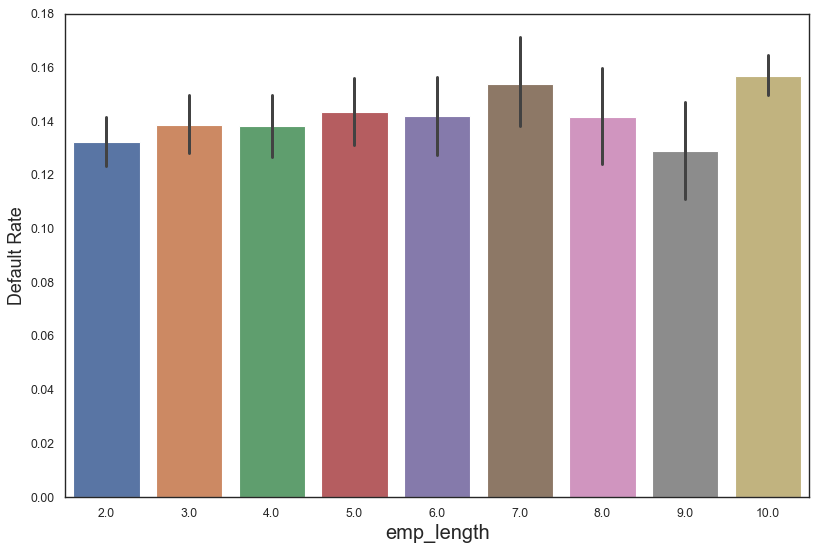

10.0    8488
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64


In [142]:
# Changing the type of 'emp_length' to numeric value
loan['emp_length'] = loan['emp_length'].map({'10+ years': int('10'),'9 years': int('9'),'8 years': int('8'),'7 years': int('7'),
                                            '6 years': int('6'),'5 years': int('5'),'4 years': int('4'),'3 years': int('3'),
                                             '2 years': int('2'),'1 years': int('1'),'< 1 years': int('0')})
loan['emp_length'].value_counts

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='emp_length', y='loan_status',data=loan)
plt.xlabel('emp_length', fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.show()
print(loan['emp_length'].value_counts())



In [143]:
pd.crosstab(loan.loan_status,loan.emp_length,normalize="columns",margins=True)

emp_length,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
loan_status,,,,,,,,,,
0,0.867863,0.861665,0.861759,0.856606,0.858395,0.846289,0.858537,0.871126,0.84319,0.855894
1,0.132137,0.138335,0.138241,0.143394,0.141605,0.153711,0.141463,0.128874,0.15681,0.144106


Text(0, 0.5, 'No. of Applicants')

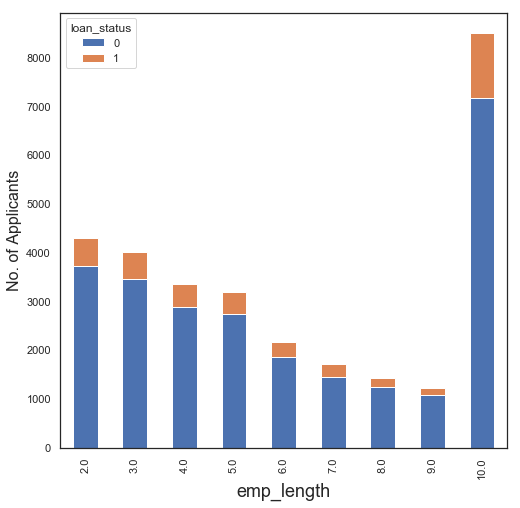

In [145]:
pd.crosstab(index=loan.emp_length,columns=loan.loan_status).plot(kind="bar",figsize=(8,8),stacked=True)
plt.xlabel('emp_length', fontsize=18)
plt.ylabel('No. of Applicants', fontsize=16)


### Observations from Univariate analysis of emp_length:
#### ------------------------------------------------------------------------------------------
####     1.No significant pattern observed with employment years and loan default
####     2. However it is observed that more people with 10+ years of work experience have taken loans.

## Univariate Analysis, Variable : int_rate

In [146]:
# Change the type of 'int_rate' to numeric

loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')
type(loan['int_rate'])
loan.int_rate.describe()


count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

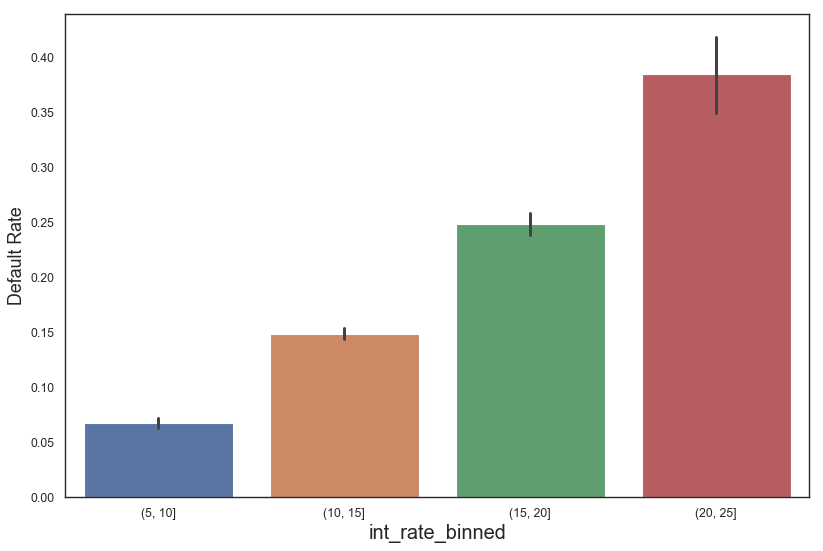

(10, 15]    18265
(5, 10]     12316
(15, 20]     7226
(20, 25]      770
Name: int_rate_binned, dtype: int64


In [147]:
#  now let us bin 'int_rate' into different buckets
bins = [5, 10, 15, 20, 25]


loan['int_rate_binned'] = pd.cut(loan['int_rate'], bins)
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='int_rate_binned', y='loan_status',data=loan)
plt.xlabel('int_rate_binned', fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.show()
print(loan['int_rate_binned'].value_counts())

### Observations from Univariate analysis of interest rate:
#### ------------------------------------------------------------------------------------------
#### 1. More people have taken loans in the interest rate between 10% and 15%
#### 2. As the Interest rate increases,the default rate increases
#### 3. interest bucket of 20%-25% being the maximum with close to 40%

## Univariate Analysis, Variable : term

<class 'pandas.core.series.Series'>
36    29096
60     9481
Name: term, dtype: int64


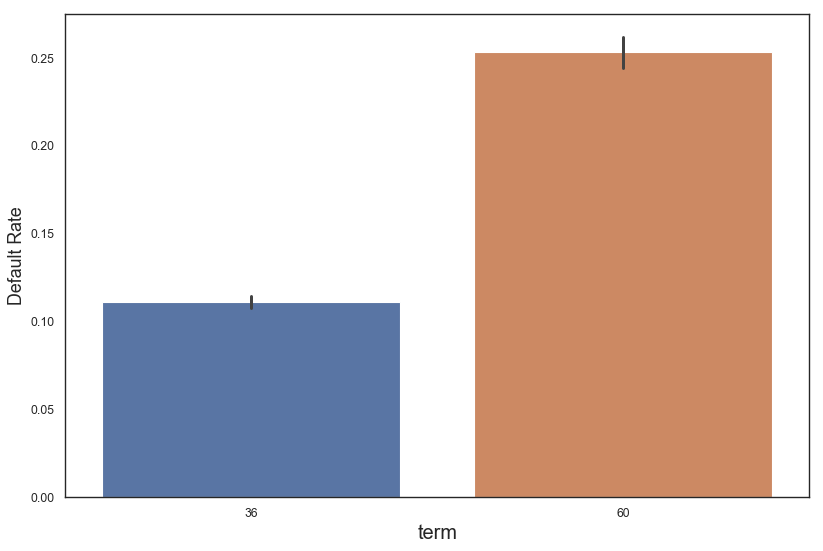

36    29096
60     9481
Name: term, dtype: int64


In [148]:
# Change the type of 'term' to numeric

loan['term'] = loan['term'].str.rstrip('months').astype('int')
print(type(loan['term']))
print(loan['term'].value_counts())
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='term', y='loan_status',data=loan)
plt.xlabel('term', fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.show()
print(loan['term'].value_counts())

term               36        60       All
loan_status                              
0            0.889091  0.746862  0.854136
1            0.110909  0.253138  0.145864


Text(0, 0.5, 'No.of Applicants')

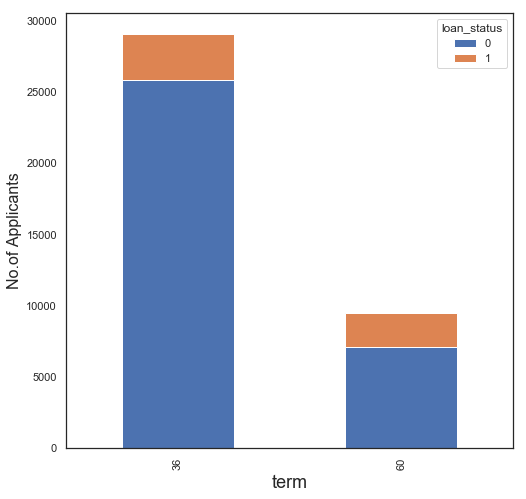

In [149]:
print(pd.crosstab(loan.loan_status,loan.term,normalize="columns",margins=True))

pd.crosstab(index=loan.term,columns=loan.loan_status).plot(kind="bar",figsize=(8,8),stacked=True)
plt.xlabel('term', fontsize=18)
plt.ylabel('No.of Applicants', fontsize=16)


### Observations from Univariate analysis of 'term'/Loan Duration:
#### ------------------------------------------------------------------------------------------
#### 1. More people have taken loans for a term of 36 months
#### 2. Larger the term duration more likely for the borrower to default, with close to 25% of defaulters for 60 month term

## Univariate Analysis, Variable : annual_inc

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
10%      3.000000e+04
20%      3.719616e+04
30%      4.450000e+04
40%      5.000400e+04
50%      5.886800e+04
60%      6.500400e+04
70%      7.500000e+04
80%      9.000000e+04
90%      1.150000e+05
95%      1.400040e+05
max      6.000000e+06
Name: annual_inc, dtype: float64


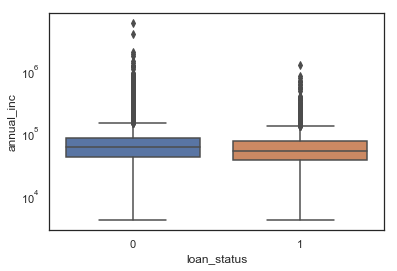

In [150]:
#let us Bin the income 'annual_inc' category into various bins
#let us check the spread of the income
print(loan.annual_inc.describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]))
sns.set(style="white")
sns.boxplot(x='loan_status', y='annual_inc', data=loan)
plt.yscale('log')
plt.show()


count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64


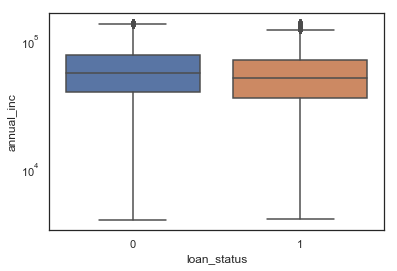

In [151]:
x = loan['annual_inc'].quantile(.95)
loan = loan.loc[(loan.annual_inc<= x)]
print(loan.annual_inc.describe())
sns.set(style="white")
sns.boxplot(x='loan_status', y='annual_inc', data=loan)
plt.yscale('log')
plt.show()

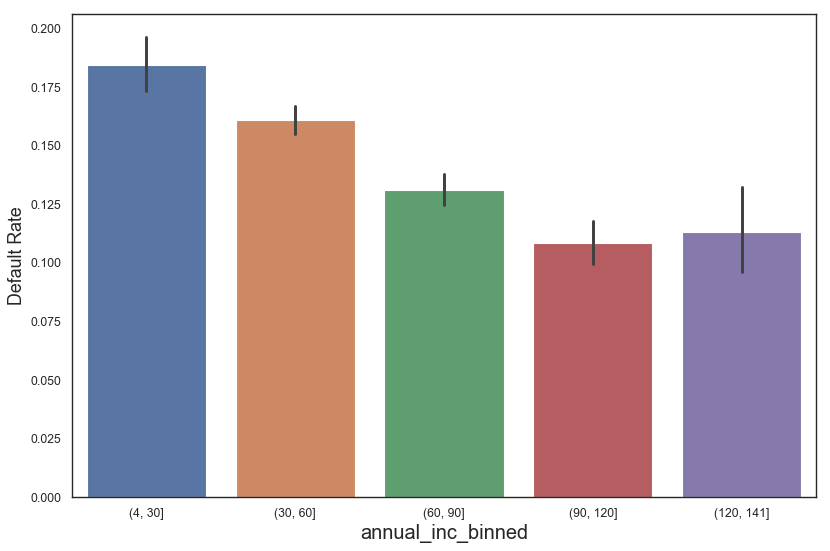

(30, 60]      16410
(60, 90]      10131
(4, 30]        4550
(90, 120]      4332
(120, 141]     1230
Name: annual_inc_binned, dtype: int64


In [152]:
# we have removed the outliers in 'annual income', now let us bin them into different buckets
bins = [4, 30, 60, 90, 120, 141]

#All the values will be in thousands
loan['annual_inc'] = loan['annual_inc']/1000
loan['annual_inc_binned'] = pd.cut(loan['annual_inc'], bins)
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='annual_inc_binned', y='loan_status',data=loan)
plt.xlabel('annual_inc_binned', fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.show()
print(loan['annual_inc_binned'].value_counts())

### Observations form Univariate analysis of annual_inc:
#### ------------------------------------------------------------------------------------------
#### 1. More people have taken loans in the annual income bracket of Rs.30,000 to Rs.90000
#### 2. Default rate has been the highest for the lower income groups.
#### 3. The default rate seems to show a decreasing trend as the annual income increases.

## Univariate Analysis, Variable : pub_rec_bankruptcies

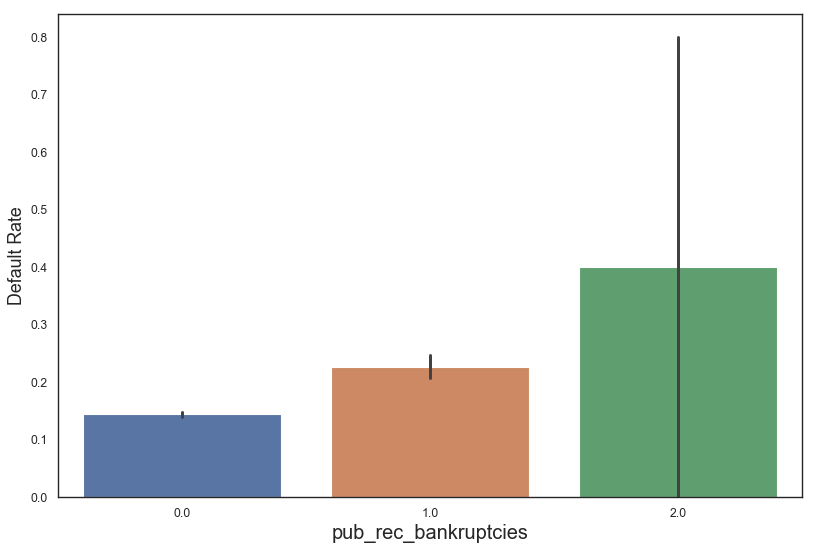

In [153]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

#remove null values for pub_rec_bankruptcies
loan = loan[~loan['pub_rec_bankruptcies'].isnull()]
sns.barplot(x='pub_rec_bankruptcies', y='loan_status',data=loan)
plt.xlabel('pub_rec_bankruptcies', fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.show()


pub_rec_bankruptcies       0.0       1.0  2.0       All
loan_status                                            
0                     0.856275  0.774234  0.6  0.852595
1                     0.143725  0.225766  0.4  0.147405


<Figure size 960x640 with 0 Axes>

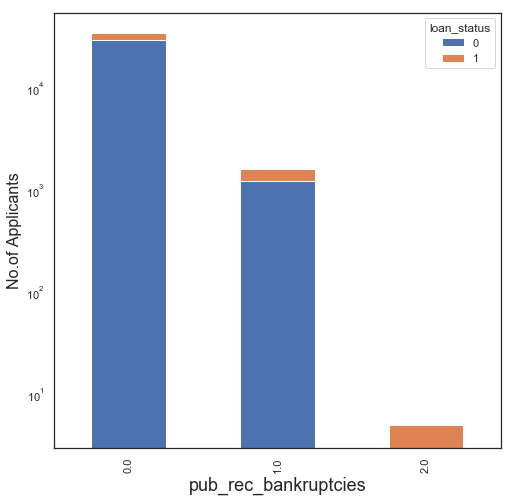

In [154]:
print(pd.crosstab(loan.loan_status,loan.pub_rec_bankruptcies,normalize="columns",margins=True))

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

pd.crosstab(index=loan.pub_rec_bankruptcies,columns=loan.loan_status).plot(kind="bar",figsize=(8,8),stacked=True)
plt.yscale('log')
plt.xlabel('pub_rec_bankruptcies', fontsize=18)
plt.ylabel('No.of Applicants', fontsize=16)
plt.show()

### Observations from Univariate analysis of pub_rec_bankruptcies       :
#### ------------------------------------------------------------------------------------------
#### 1. The default rate seems to show a increasing trend as the the number of public record of bankruptcies.
#### 2. With public recorded banruptcies = 2, having the hishest default rate of 40%

## Univariate Analysis, Variable : dti

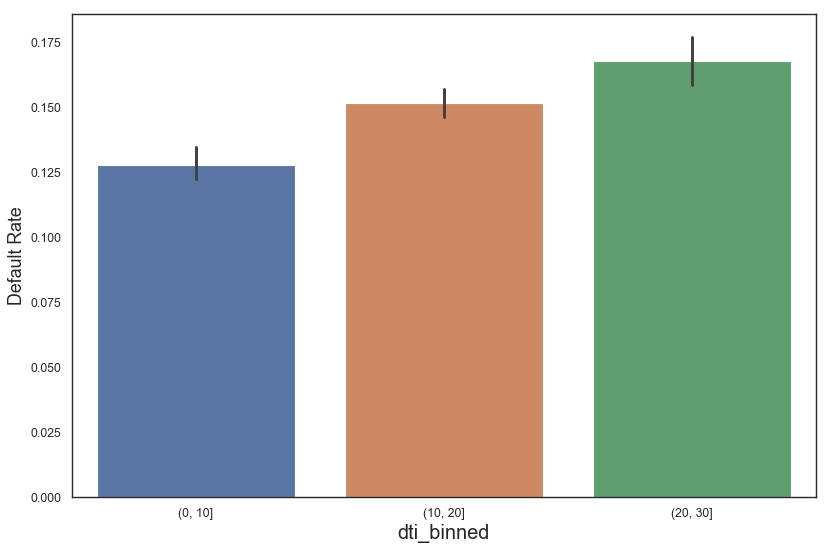

(10, 20]    17400
(0, 10]     11434
(20, 30]     7006
Name: dti_binned, dtype: int64


In [155]:
#bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
bins = [0, 10, 20, 30]
loan['dti_binned'] = pd.cut(loan['dti'], bins)
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='dti_binned', y='loan_status',data=loan)
plt.xlabel('dti_binned', fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.show()
print(loan['dti_binned'].value_counts())

### Observations from Univariate analysis of debt to income(dti) ratio  :
#### ------------------------------------------------------------------------------------------
#### 1. The default rate seems to show an increasing trend as the dti increases

## Univariate Analysis, Variable : home_ownership

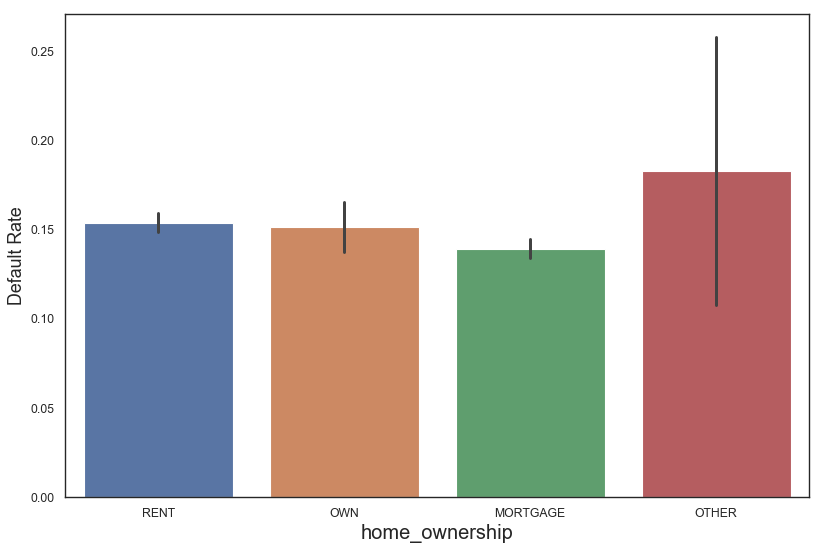

RENT        17659
MORTGAGE    15453
OWN          2791
OTHER          93
Name: home_ownership, dtype: int64


In [156]:
# home ownership

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='home_ownership', y='loan_status',data=loan)
plt.xlabel('home_ownership', fontsize=18)
plt.ylabel('Default Rate', fontsize=16)
plt.show()
print(loan['home_ownership'].value_counts())

home_ownership  MORTGAGE     OTHER     OWN      RENT       All
loan_status                                                   
0               0.860674  0.817204  0.8488  0.846311  0.852595
1               0.139326  0.182796  0.1512  0.153689  0.147405


Text(0, 0.5, 'No. of Applicants')

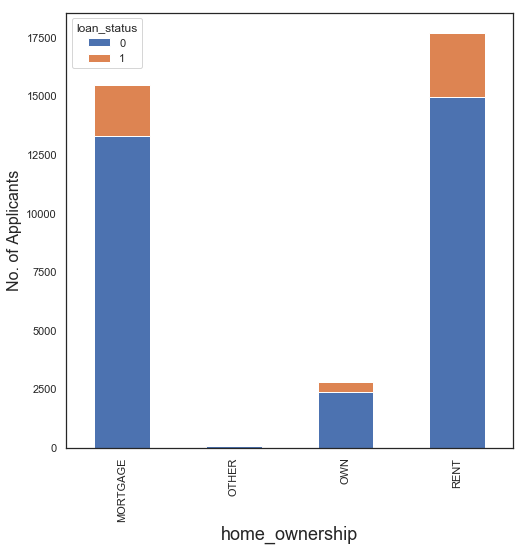

In [158]:
print(pd.crosstab(loan.loan_status,loan.home_ownership,normalize="columns",margins=True))

pd.crosstab(index=loan.home_ownership,columns=loan.loan_status).plot(kind="bar",figsize=(8,8),stacked=True)
plt.xlabel('home_ownership', fontsize=18)
plt.ylabel('No. of Applicants', fontsize=16)

### Observations from Univariate analysis of home ownership  :
#### ------------------------------------------------------------------------------------------
#### 1. More people who have mortgages or live in rented homes take loan
#### 2. No major trends observed with respect to loan defaults